## PROBLEM ON : ADVANCE REGRESSION
### HOUSE PRICE PREDICTION
Build model the price of houses with the available independent variables

#### PRELIMINARY : EDA

#### IGNORE WARNING AND IMPORT LIBRRARIES

In [828]:
#import required libraries
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

##### READING THE DATA CSV

In [829]:
# reading the dataset
data = pd.read_csv("train.csv", encoding = 'utf-8')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###### SANITY FUNCTIONS AND INVESTIGATION ON DATA

In [830]:
def number_rows_columns(data):
    rows, columns = data.shape
    print(f'The dataset has {rows} rows and {columns} columns')
    print("\n")
    

In [831]:
number_rows_columns(data)

The dataset has 1460 rows and 81 columns




In [832]:
def check_duplicates(data):
    row, column = data[data.duplicated()].shape
    print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')
    

In [833]:
check_duplicates(data)

There are no duplicates in the dataset.


In [834]:
def category_numerical(data):
    # number of numerical and categorical features
    num, obj = 0, 0
    for feature in data:
        if data[feature].dtype == 'O':
            obj += 1
        else:
            num += 1
    print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
    print(f'The dataset has {num} numerical features and {obj} categorical features')
    print("\n")

In [835]:
category_numerical(data)

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 38 numerical features and 43 categorical features




In [836]:
def percentage_missing(data):
    # Percentage of missing values
    print('\nPERCENTAGE MISSING VALUES:')
    c=0
    for feature in data:
        if data[feature].isnull().sum()!=0:
            print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
        else:
            c+=1
    if c == len(data.columns):print('There is no missing values in the dataset')
    print("\n")

In [837]:
percentage_missing(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'Alley' has 93.77% missing values
The feature 'MasVnrType' has 0.55% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'BsmtQual' has 2.53% missing values
The feature 'BsmtCond' has 2.53% missing values
The feature 'BsmtExposure' has 2.6% missing values
The feature 'BsmtFinType1' has 2.53% missing values
The feature 'BsmtFinType2' has 2.6% missing values
The feature 'Electrical' has 0.07% missing values
The feature 'FireplaceQu' has 47.26% missing values
The feature 'GarageType' has 5.55% missing values
The feature 'GarageYrBlt' has 5.55% missing values
The feature 'GarageFinish' has 5.55% missing values
The feature 'GarageQual' has 5.55% missing values
The feature 'GarageCond' has 5.55% missing values
The feature 'PoolQC' has 99.52% missing values
The feature 'Fence' has 80.75% missing values
The feature 'MiscFeature' has 96.3% missing values




##### NUMBER OF UNIQUE CATEGORICAL FEATURES

In [838]:
# Looping to find the number of unique categorical features
s_cunique = 0
n_cunique = 0

for feature in data:
    if data[feature].dtype == 'O' : 
        if len(data[feature].unique())==1:
            s_cunique += 1
        else:
            n_cunique += 1

print(f'There are {s_cunique} categorical features that has one unique value.')
print(f'There are {n_cunique} categorical features that has more than one unique value.')

There are 0 categorical features that has one unique value.
There are 43 categorical features that has more than one unique value.


##### NUMBER OF UNIQUE NUMERICAL FEATURES

In [839]:
s_nunique = 0
n_nunique = 0
for feature in data:
    if data[feature].dtype != 'O':
        if len(data[feature].unique())==1:
            s_nunique += 1
        else:
            n_nunique += 1

print(f'There are {s_nunique} numerical features that has one unique value including Nan')
print(f'There are {n_nunique} numerical features that has more than one unique value')

There are 0 numerical features that has one unique value including Nan
There are 38 numerical features that has more than one unique value


In [840]:
percentage_missing(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'Alley' has 93.77% missing values
The feature 'MasVnrType' has 0.55% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'BsmtQual' has 2.53% missing values
The feature 'BsmtCond' has 2.53% missing values
The feature 'BsmtExposure' has 2.6% missing values
The feature 'BsmtFinType1' has 2.53% missing values
The feature 'BsmtFinType2' has 2.6% missing values
The feature 'Electrical' has 0.07% missing values
The feature 'FireplaceQu' has 47.26% missing values
The feature 'GarageType' has 5.55% missing values
The feature 'GarageYrBlt' has 5.55% missing values
The feature 'GarageFinish' has 5.55% missing values
The feature 'GarageQual' has 5.55% missing values
The feature 'GarageCond' has 5.55% missing values
The feature 'PoolQC' has 99.52% missing values
The feature 'Fence' has 80.75% missing values
The feature 'MiscFeature' has 96.3% missing values




##### DROP FEATURES WITH MORE THAN 80% MISSING VALUES

In [841]:
##removal of data with more than 80% missing values 
data=data[data.columns[data.isnull().mean() < 0.8]]

In [842]:
percentage_missing(data)
number_rows_columns(data)
category_numerical(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'MasVnrType' has 0.55% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'BsmtQual' has 2.53% missing values
The feature 'BsmtCond' has 2.53% missing values
The feature 'BsmtExposure' has 2.6% missing values
The feature 'BsmtFinType1' has 2.53% missing values
The feature 'BsmtFinType2' has 2.6% missing values
The feature 'Electrical' has 0.07% missing values
The feature 'FireplaceQu' has 47.26% missing values
The feature 'GarageType' has 5.55% missing values
The feature 'GarageYrBlt' has 5.55% missing values
The feature 'GarageFinish' has 5.55% missing values
The feature 'GarageQual' has 5.55% missing values
The feature 'GarageCond' has 5.55% missing values


The dataset has 1460 rows and 77 columns


NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 38 numerical features and 39 categorical features




In [843]:
## droping 'Id'
data = data.drop(['Id'],axis='columns')

###### DATA  TRANSFORMATION OF YEAR TO AGE 

In [844]:
data['YearBuilt_Old'] = data.YearBuilt.max()-data.YearBuilt
data['YearRemodAdd_Old'] = data.YearRemodAdd.max()-data.YearRemodAdd
data['GarageYrBlt_Old'] = data.GarageYrBlt.max()-data.GarageYrBlt
data['YrSold_Old'] = data.YrSold.max()-data.YrSold
data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
1281,1990,1990,1990.0,2006,20,20,20.0,4
751,2003,2003,2003.0,2007,7,7,7.0,3
430,1971,1971,1971.0,2008,39,39,39.0,2
519,1926,2004,1926.0,2009,84,6,84.0,1
921,1900,2003,NaN,2008,110,7,NaN,2
2,2001,2002,2001.0,2008,9,8,9.0,2
1075,1940,1984,1940.0,2007,70,26,70.0,3
105,2003,2004,2003.0,2008,7,6,7.0,2
1026,1960,1960,1960.0,2010,50,50,50.0,0
185,1892,1993,1993.0,2006,118,17,17.0,4


In [845]:
## droping 'YearBuilt','YearRemodAdd','GarageYrBlt' as these are redundant and derived columns have more significant than year alone but 
## Yr_Sold was not dropped considering if other factors relate them
data = data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'],axis='columns')

In [846]:
number_rows_columns(data)

The dataset has 1460 rows and 77 columns




##### MISSING VALUE IMPUTATION 

In [847]:
percentage_missing(data)
number_rows_columns(data)
category_numerical(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'MasVnrType' has 0.55% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'BsmtQual' has 2.53% missing values
The feature 'BsmtCond' has 2.53% missing values
The feature 'BsmtExposure' has 2.6% missing values
The feature 'BsmtFinType1' has 2.53% missing values
The feature 'BsmtFinType2' has 2.6% missing values
The feature 'Electrical' has 0.07% missing values
The feature 'FireplaceQu' has 47.26% missing values
The feature 'GarageType' has 5.55% missing values
The feature 'GarageFinish' has 5.55% missing values
The feature 'GarageQual' has 5.55% missing values
The feature 'GarageCond' has 5.55% missing values
The feature 'GarageYrBlt_Old' has 5.55% missing values


The dataset has 1460 rows and 77 columns


NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 38 numerical features and 39 categorical features




In [848]:
print('\nLESS THAN 6% MISSING VALUES IMPUTATION')
less_th6_lst=[]
for feature in data:
    if data[feature].dtype == 'O'and np.round((data[feature].isnull().mean()*100),2)<=50.0 and np.round((data[feature].isnull().mean()*100),2)>0.0:
        less_th6_lst.append(str(feature))

for feature in less_th6_lst:
    data[""+feature+""].fillna(data[""+feature+""].mode()[0],inplace=True)
    print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")


LESS THAN 6% MISSING VALUES IMPUTATION
The feature 'MasVnrType' has 0.0% missing values
The feature 'BsmtQual' has 0.0% missing values
The feature 'BsmtCond' has 0.0% missing values
The feature 'BsmtExposure' has 0.0% missing values
The feature 'BsmtFinType1' has 0.0% missing values
The feature 'BsmtFinType2' has 0.0% missing values
The feature 'Electrical' has 0.0% missing values
The feature 'FireplaceQu' has 0.0% missing values
The feature 'GarageType' has 0.0% missing values
The feature 'GarageFinish' has 0.0% missing values
The feature 'GarageQual' has 0.0% missing values
The feature 'GarageCond' has 0.0% missing values


In [849]:
percentage_missing(data)
number_rows_columns(data)
category_numerical(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'GarageYrBlt_Old' has 5.55% missing values


The dataset has 1460 rows and 77 columns


NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 38 numerical features and 39 categorical features




###### ANALYSIS ON 'LotFrontage'

In [850]:
data.LotFrontage.describe([0.25,0.50,0.75,0.99])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64

##### MEAN AND MEDIAN IS CLOSE HENCE WE WILL IMPUTE MEDIAN VALUE 

In [851]:
print(data.columns.values)
number_rows_columns(data)

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'MasVnrArea' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual'
 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2'
 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir'
 'Electrical' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd' 'Functional' 'Fireplaces'
 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageCars' 'GarageArea'
 'GarageQual' 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF'
 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold'
 'YrSold' 'SaleType' 'SaleCondition' 'SalePrice' 'YearBuilt_Old'
 'YearRemodAdd_Old' 'GarageYrBlt_Old' 

In [852]:
 data.LotFrontage.fillna(data.LotFrontage.median(),inplace=True)

###### ANALYSIS ON 'MasVnrArea'

In [853]:
data.MasVnrArea.describe([0.25,0.50,0.75,0.99])

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
99%       791.920000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [854]:
print(data['MasVnrArea'].value_counts())

0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64


#####  IMPUTE MODE  VALUE 

In [855]:
 data.MasVnrArea.fillna(data.MasVnrArea.mode()[0],inplace=True)

###### ANALYSIS ON 'GarageYrBlt_Old'

In [856]:
 ### imputing -1 in missing places of GarageYrBlt_Old as missing values indicate not having a garage built 
data.GarageYrBlt_Old.fillna(-1,inplace=True)

In [857]:
percentage_missing(data)
number_rows_columns(data)
category_numerical(data)


PERCENTAGE MISSING VALUES:
There is no missing values in the dataset


The dataset has 1460 rows and 77 columns


NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 38 numerical features and 39 categorical features




In [858]:
# number of numerical and categorical features
num, obj = 0, 0
numerical_feature=[]
for feature in data:
    if data[feature].dtype == 'O':
        categorical_feature.append(feature)
        obj += 1
    else:
        num += 1
        numerical_feature.append(feature)

print(f'{categorical_feature} are categorical features')
print(f'{numerical_feature} are numerical features')

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'YearRemodAdd_Old', 'YrSold_Old', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl'

In [859]:
category_numerical(data)

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 38 numerical features and 39 categorical features




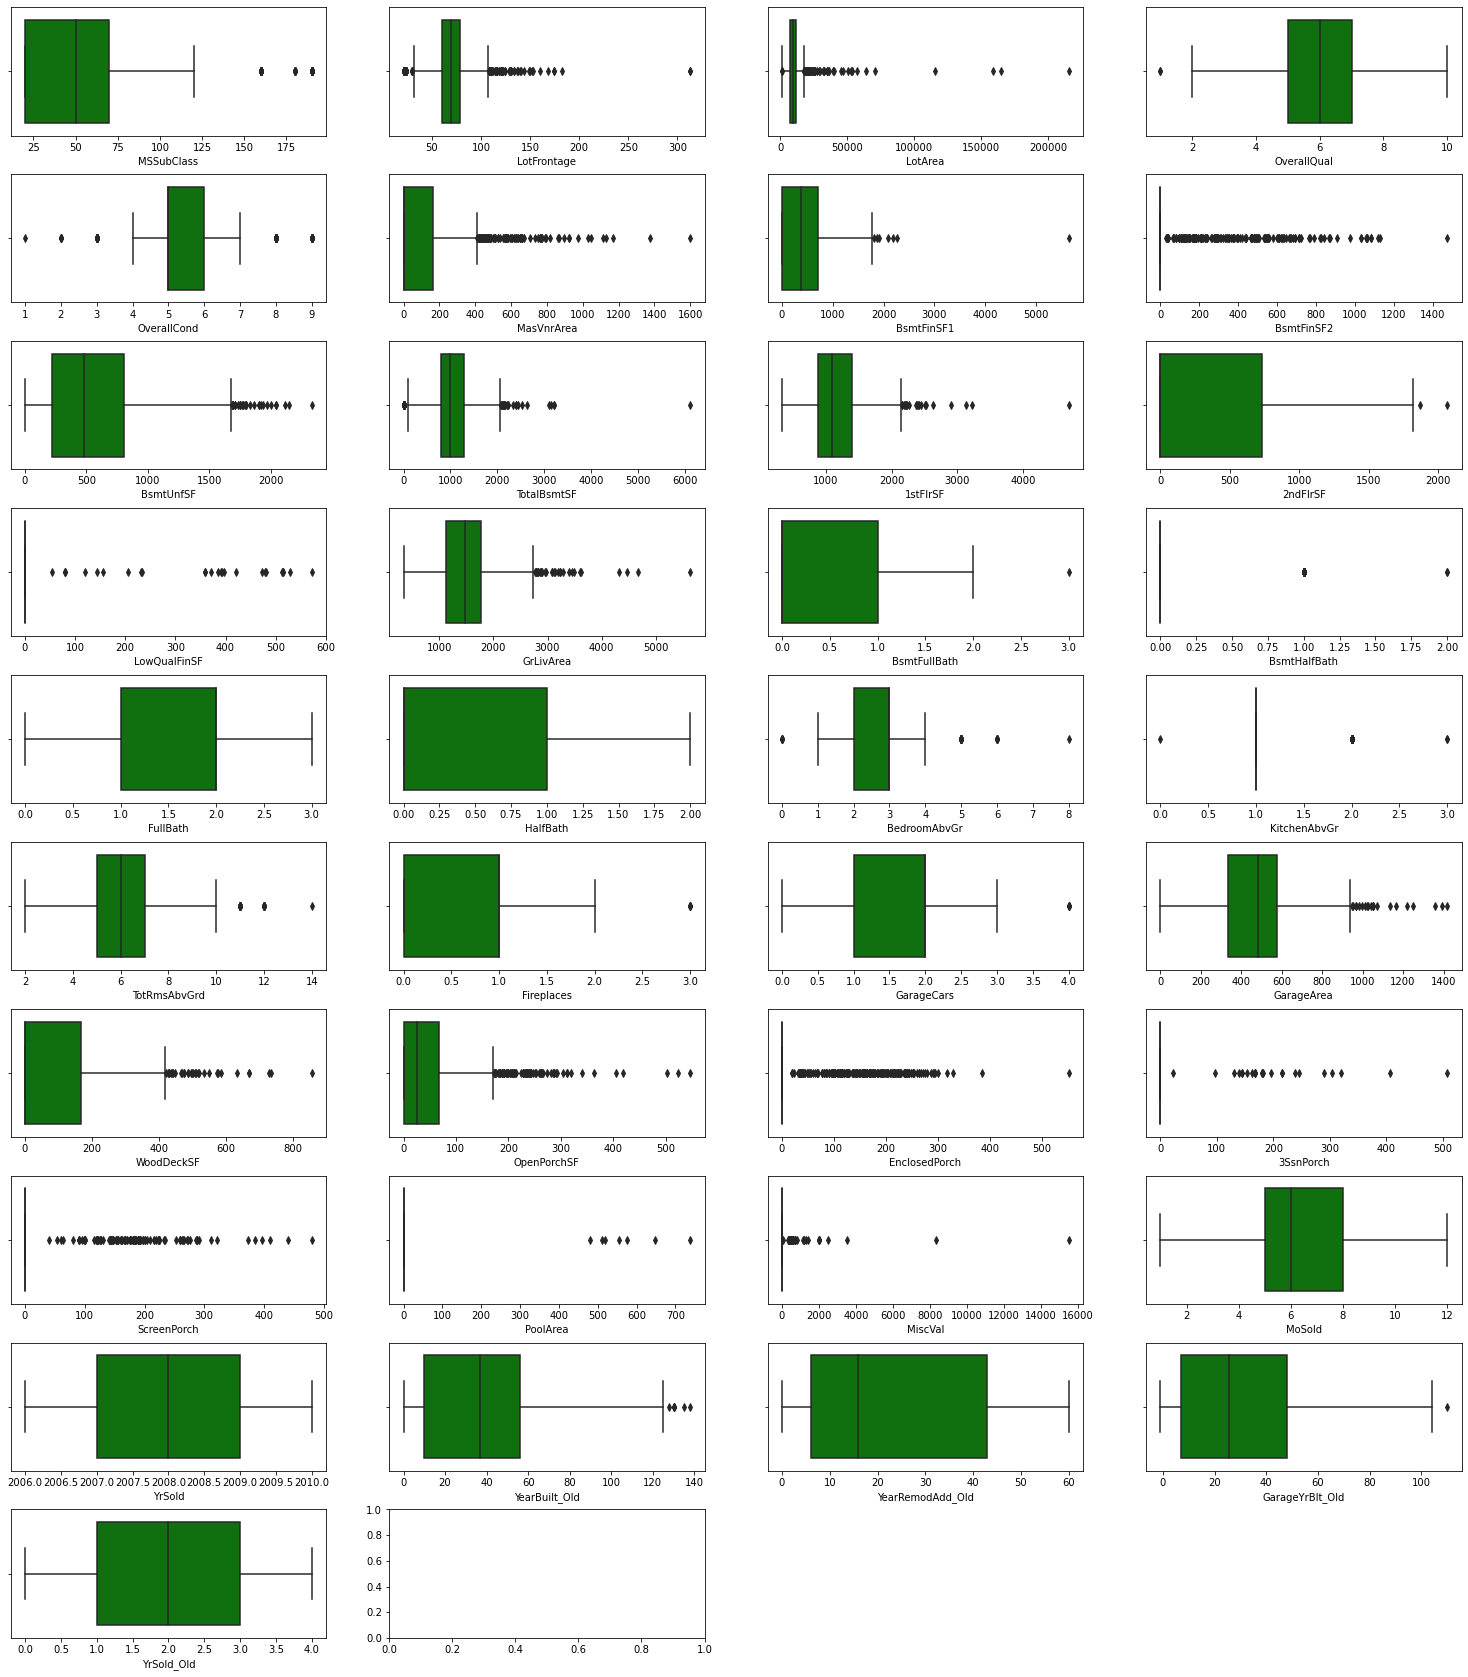

In [860]:
#Creating subplots
import seaborn as sns
fig = plt.figure(figsize=(26,30))
spec = fig.add_gridspec(10,4)
sec=[]
cnt=0
spec.update(wspace=0.2, hspace=0.3)


sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])
sec_25 = fig.add_subplot(spec[6,0])
sec_26 = fig.add_subplot(spec[6,1])
sec_27 = fig.add_subplot(spec[6,2])
sec_28 = fig.add_subplot(spec[6,3])
sec_29 = fig.add_subplot(spec[7,0])
sec_30 = fig.add_subplot(spec[7,1])
sec_31 = fig.add_subplot(spec[7,2])
sec_32 = fig.add_subplot(spec[7,3])
sec_33 = fig.add_subplot(spec[8,0])
sec_34 = fig.add_subplot(spec[8,1])
sec_35 = fig.add_subplot(spec[8,2])
sec_36 = fig.add_subplot(spec[8,3])
sec_37 = fig.add_subplot(spec[9,0])
sec_38 = fig.add_subplot(spec[9,1])



sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,sec_12,sec_13,sec_14,sec_15,sec_16,sec_17,sec_18,sec_19,sec_20,sec_21,sec_22,sec_23,sec_24,sec_25,sec_26,sec_27,sec_28,sec_29,sec_30,sec_31,sec_32,sec_33,sec_34,sec_35,sec_36,sec_37,sec_38]
cnt = 0
for feature in numerical_feature:
    if data[feature].dtype=='O' or feature=='SalePrice':
        continue
    else:

        sns.boxplot(x=data[feature], ax=sec[cnt], color='green')
        cnt+=1


In [861]:
outlier_feature_moretha2=numerical_feature
for feature in outlier_feature_moretha2:
    if data[feature].dtype!='O' and len(data[feature].unique())>2:
        lower_quartile = data[feature].quantile(0.25)
        upper_quartile = data[feature].quantile(0.75)
        IQR = upper_quartile - lower_quartile
        lower_fence = lower_quartile - (1.5*IQR)
        upper_fence = upper_quartile + (1.5*IQR)
        
        data[feature] = np.where(data[feature]>upper_fence, 
                                upper_fence, 
                                data[feature])
        
        data[feature] = np.where(data[feature]<lower_fence,
                               lower_fence,
                               data[feature])

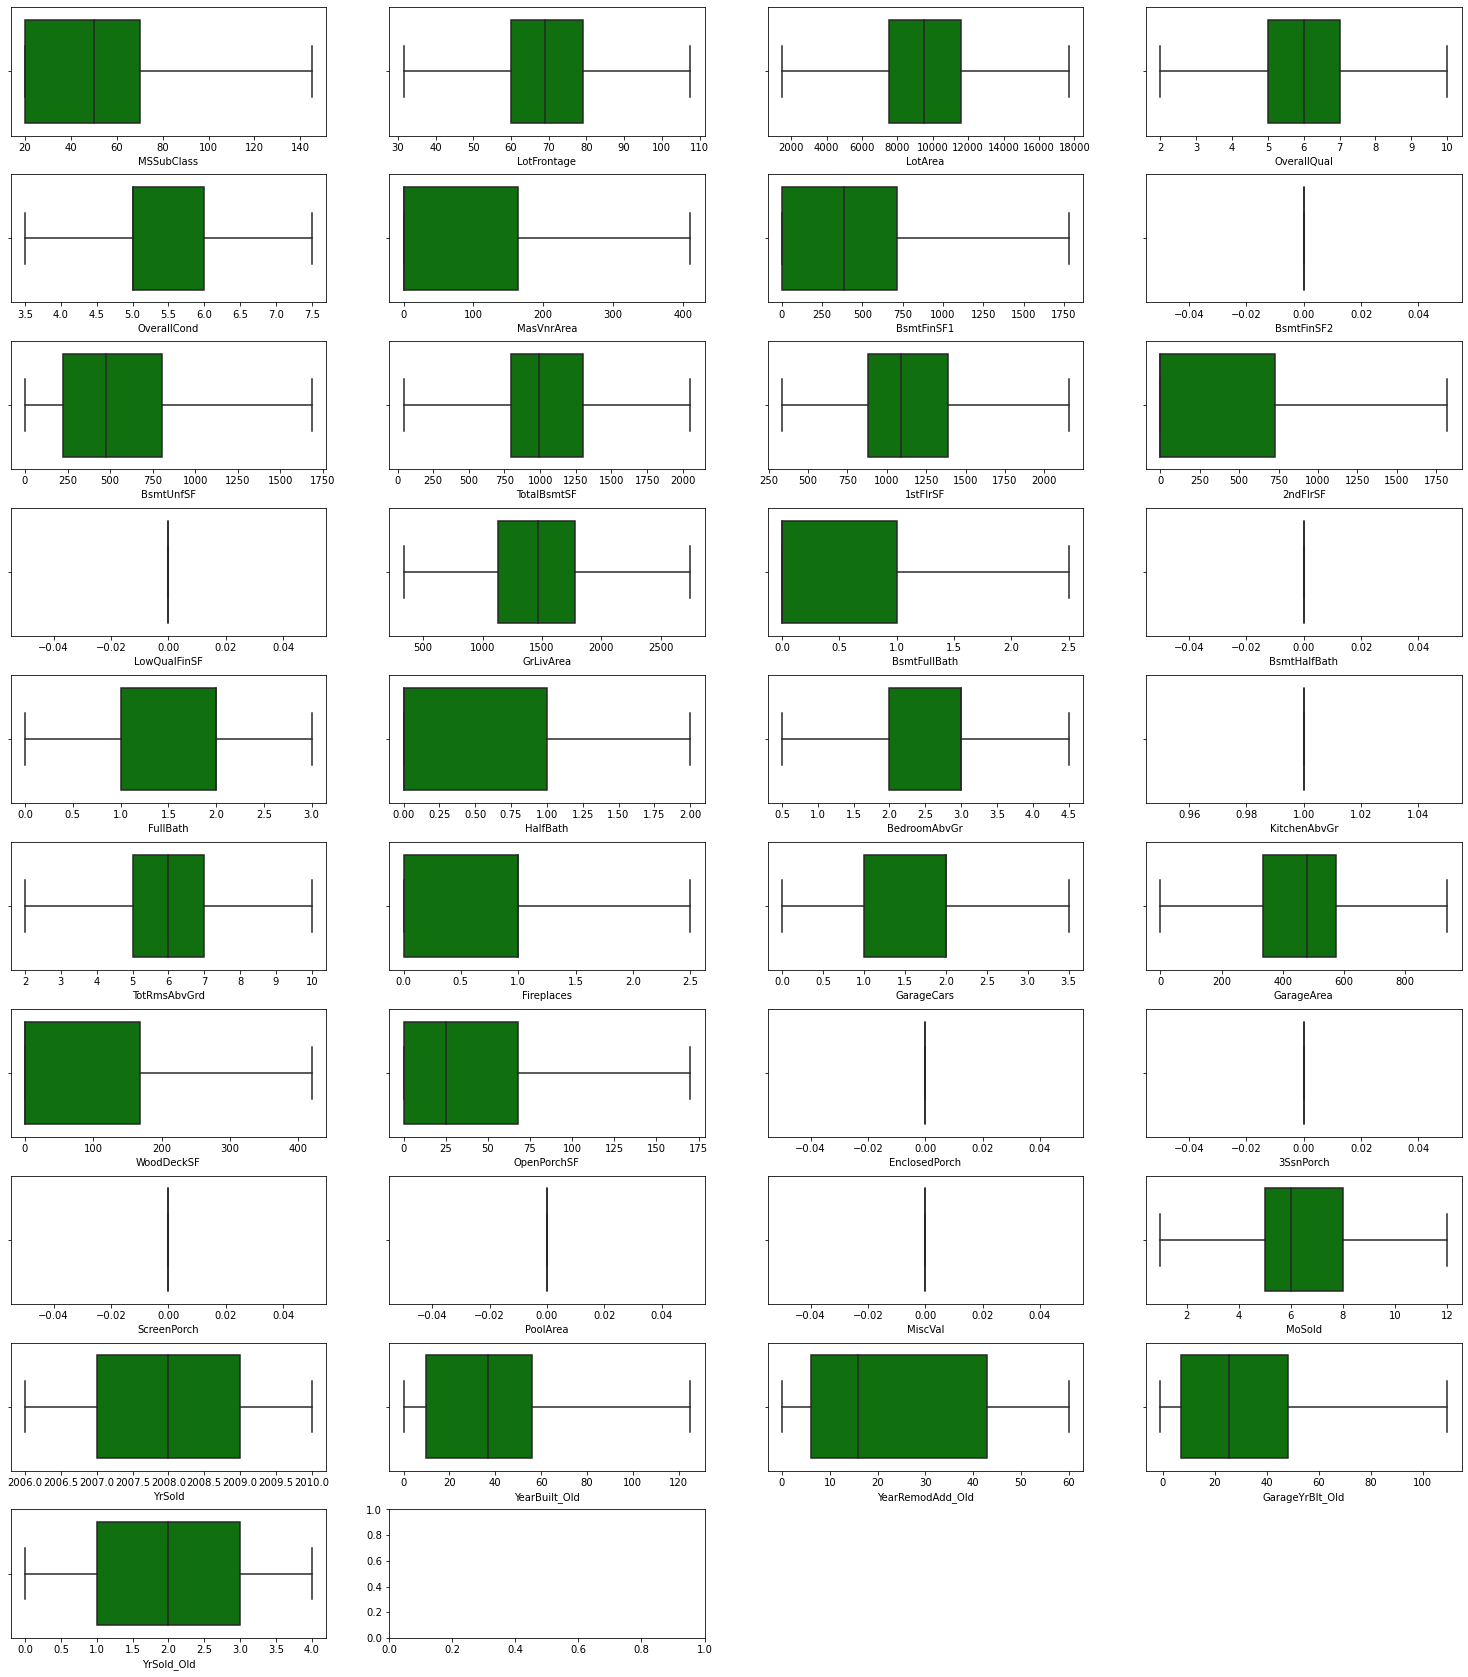

In [862]:
#Creating subplots
import seaborn as sns
fig = plt.figure(figsize=(26,30))
spec = fig.add_gridspec(10,4)
sec=[]
cnt=0
spec.update(wspace=0.2, hspace=0.3)


sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])
sec_25 = fig.add_subplot(spec[6,0])
sec_26 = fig.add_subplot(spec[6,1])
sec_27 = fig.add_subplot(spec[6,2])
sec_28 = fig.add_subplot(spec[6,3])
sec_29 = fig.add_subplot(spec[7,0])
sec_30 = fig.add_subplot(spec[7,1])
sec_31 = fig.add_subplot(spec[7,2])
sec_32 = fig.add_subplot(spec[7,3])
sec_33 = fig.add_subplot(spec[8,0])
sec_34 = fig.add_subplot(spec[8,1])
sec_35 = fig.add_subplot(spec[8,2])
sec_36 = fig.add_subplot(spec[8,3])
sec_37 = fig.add_subplot(spec[9,0])
sec_38 = fig.add_subplot(spec[9,1])



sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,sec_12,sec_13,sec_14,sec_15,sec_16,sec_17,sec_18,sec_19,sec_20,sec_21,sec_22,sec_23,sec_24,sec_25,sec_26,sec_27,sec_28,sec_29,sec_30,sec_31,sec_32,sec_33,sec_34,sec_35,sec_36,sec_37,sec_38]
cnt = 0
for feature in numerical_feature:
    if data[feature].dtype=='O' or feature=='SalePrice':
        continue
    else:

        sns.boxplot(x=data[feature], ax=sec[cnt], color='green')
        cnt+=1

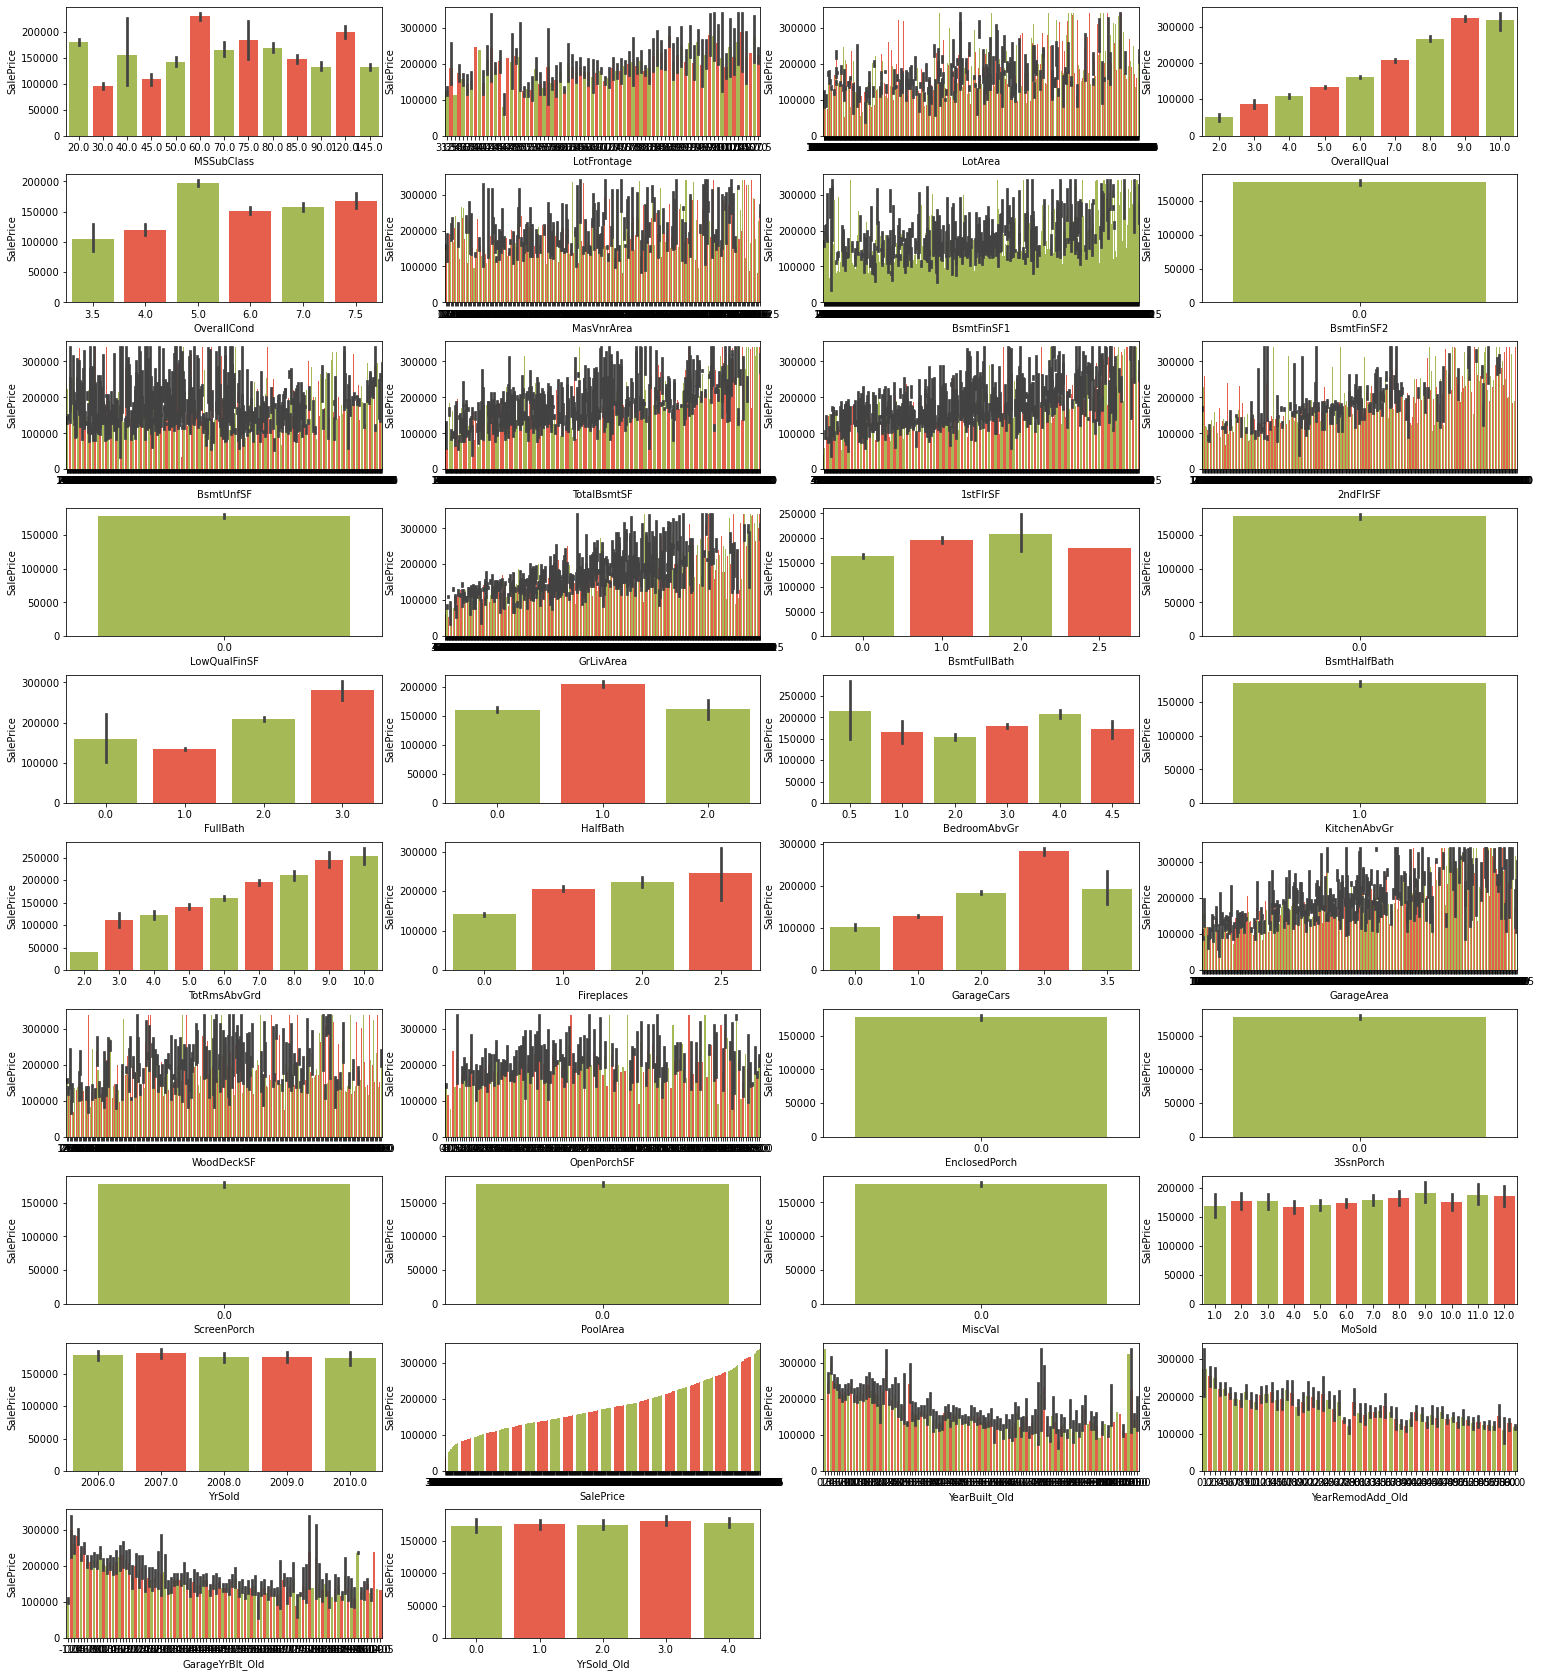

In [864]:
# #Creating subplots
# import seaborn as sns
# fig = plt.figure(figsize=(26,30))
# spec = fig.add_gridspec(10,4)
# sec=[]
# cnt=0
# spec.update(wspace=0.2, hspace=0.3)


# sec_01 = fig.add_subplot(spec[0,0])
# sec_02 = fig.add_subplot(spec[0,1])
# sec_03 = fig.add_subplot(spec[0,2])
# sec_04 = fig.add_subplot(spec[0,3])
# sec_05 = fig.add_subplot(spec[1,0])
# sec_06 = fig.add_subplot(spec[1,1])
# sec_07 = fig.add_subplot(spec[1,2])
# sec_08 = fig.add_subplot(spec[1,3])
# sec_09 = fig.add_subplot(spec[2,0])
# sec_10 = fig.add_subplot(spec[2,1])
# sec_11 = fig.add_subplot(spec[2,2])
# sec_12 = fig.add_subplot(spec[2,3])
# sec_13 = fig.add_subplot(spec[3,0])
# sec_14 = fig.add_subplot(spec[3,1])
# sec_15 = fig.add_subplot(spec[3,2])
# sec_16 = fig.add_subplot(spec[3,3])
# sec_17 = fig.add_subplot(spec[4,0])
# sec_18 = fig.add_subplot(spec[4,1])
# sec_19 = fig.add_subplot(spec[4,2])
# sec_20 = fig.add_subplot(spec[4,3])
# sec_21 = fig.add_subplot(spec[5,0])
# sec_22 = fig.add_subplot(spec[5,1])
# sec_23 = fig.add_subplot(spec[5,2])
# sec_24 = fig.add_subplot(spec[5,3])
# sec_25 = fig.add_subplot(spec[6,0])
# sec_26 = fig.add_subplot(spec[6,1])
# sec_27 = fig.add_subplot(spec[6,2])
# sec_28 = fig.add_subplot(spec[6,3])
# sec_29 = fig.add_subplot(spec[7,0])
# sec_30 = fig.add_subplot(spec[7,1])
# sec_31 = fig.add_subplot(spec[7,2])
# sec_32 = fig.add_subplot(spec[7,3])
# sec_33 = fig.add_subplot(spec[8,0])
# sec_34 = fig.add_subplot(spec[8,1])
# sec_35 = fig.add_subplot(spec[8,2])
# sec_36 = fig.add_subplot(spec[8,3])
# sec_37 = fig.add_subplot(spec[9,0])
# sec_38 = fig.add_subplot(spec[9,1])



# sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,sec_12,sec_13,sec_14,sec_15,sec_16,sec_17,sec_18,sec_19,sec_20,sec_21,sec_22,sec_23,sec_24,sec_25,sec_26,sec_27,sec_28,sec_29,sec_30,sec_31,sec_32,sec_33,sec_34,sec_35,sec_36,sec_37,sec_38]
# cnt = 0
# for feature in numerical_feature:
#     if feature!='SalePrice':
#         sns.barplot(data =data, 
#                 x=data[feature],
#                  y='SalePrice', 
#                  ax=sec[cnt],
#                  palette=['#AECB46', "#FF4C33"])
#     cnt+=1

In [826]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

ModuleNotFoundError: No module named 'shap'

In [827]:
!pip install snap

  Created wheel for snap: filename=snap-0.5-py3-none-any.whl size=19396 sha256=d54836fc2618fb82b34879b0e446df15be20a6495321063fb9f7ff310815d2c9
  Stored in directory: c:\users\vaide\appdata\local\pip\cache\wheels\38\93\54\dcf391da221097b15087b79374dba94c674bc56de447ac8fc8
Successfully built snap


In [469]:
outlier_feature_moretha2=['MasVnrArea']
for feature in outlier_feature_moretha2:
    if data[feature].dtype!='O' and len(data[feature].unique())>2:
        lower_quartile = data[feature].quantile(0.25)
        upper_quartile = data[feature].quantile(0.75)
        IQR = upper_quartile - lower_quartile
        lower_fence = lower_quartile - (1.5*IQR)
        upper_fence = upper_quartile + (1.5*IQR)
        
        data[feature] = np.where(data[feature]>upper_fence, 
                                upper_fence, 
                                data[feature])
        
        data[feature] = np.where(data[feature]<lower_fence,
                               lower_fence,
                               data[feature])

In [467]:
data = data[data['MasVnrArea'] < data['MasVnrArea'].quantile(0.99)]

In [253]:
data.nunique()

MSSubClass            15
MSZoning               5
LotFrontage          110
LotArea             1073
Street                 2
LotShape               4
LandContour            4
Utilities              2
LotConfig              5
LandSlope              3
Neighborhood          25
Condition1             9
Condition2             8
BldgType               5
HouseStyle             8
OverallQual           10
OverallCond            9
RoofStyle              6
RoofMatl               8
Exterior1st           15
Exterior2nd           16
MasVnrType             4
MasVnrArea           327
ExterQual              4
ExterCond              5
Foundation             6
BsmtQual               4
BsmtCond               4
BsmtExposure           4
BsmtFinType1           6
BsmtFinSF1           637
BsmtFinType2           6
BsmtFinSF2           144
BsmtUnfSF            780
TotalBsmtSF          721
Heating                6
HeatingQC              5
CentralAir             2
Electrical             5
1stFlrSF             753


In [254]:
data.describe([0.25,0.50,0.75,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,38.732192,25.134247,31.493836,2.184247
std,42.300571,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,30.202904,20.645407,24.689725,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,10.000000,6.000000,8.000000,1.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,37.000000,16.000000,30.000000,2.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,56.000000,43.000000,49.000000,3.000000
99%,190.000000,141.000000,37567.640000,10.000000,9.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000,110.820000,60.000000,94.000000,4.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


In [255]:
print(data.columns.values)

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'MasVnrArea' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual'
 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2'
 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir'
 'Electrical' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd' 'Functional' 'Fireplaces'
 'GarageType' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SaleType' 'SaleCondition' 'SalePrice' 'YearBuilt_Old' 'YearRemodAdd_Old'
 'GarageYrBlt_Old' 'YrSold_Old']


In [256]:
data.shape

(1460, 76)

In [257]:
# number of numerical and categorical features
num, obj = 0, 0
for feature in data:
    if data[feature].dtype == 'O':
        obj += 1
    else:
        num += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'The dataset has {num} numerical features and {obj} categorical features')

# Percentage of missing values
print('\nPERCENTAGE MISSING VALUES BEFORE FILLING:')
c=0
for feature in data:
    if data[feature].isnull().sum()!=0:
        print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
    else:
        c+=1
if c == len(data.columns):print('There is no missing values in the dataset')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 38 numerical features and 38 categorical features

PERCENTAGE MISSING VALUES BEFORE FILLING:
The feature 'LotFrontage' has 17.74% missing values
The feature 'MasVnrType' has 0.55% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'BsmtQual' has 2.53% missing values
The feature 'BsmtCond' has 2.53% missing values
The feature 'BsmtExposure' has 2.6% missing values
The feature 'BsmtFinType1' has 2.53% missing values
The feature 'BsmtFinType2' has 2.6% missing values
The feature 'Electrical' has 0.07% missing values
The feature 'GarageType' has 5.55% missing values
The feature 'GarageFinish' has 5.55% missing values
The feature 'GarageQual' has 5.55% missing values
The feature 'GarageCond' has 5.55% missing values
The feature 'GarageYrBlt_Old' has 5.55% missing values


In [258]:
print('\nLESS THAN 6% MISSING VALUES IMPUTATION')
less_th6_lst=[]
for feature in data:
    if data[feature].dtype == 'O'and np.round((data[feature].isnull().mean()*100),2)<=6.0 and np.round((data[feature].isnull().mean()*100),2)>0.0:
        less_th6_lst.append(str(feature))

for feature in less_th6_lst:
    data[""+feature+""].fillna(data[""+feature+""].mode()[0],inplace=True)
    print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")



LESS THAN 6% MISSING VALUES IMPUTATION
The feature 'MasVnrType' has 0.0% missing values
The feature 'BsmtQual' has 0.0% missing values
The feature 'BsmtCond' has 0.0% missing values
The feature 'BsmtExposure' has 0.0% missing values
The feature 'BsmtFinType1' has 0.0% missing values
The feature 'BsmtFinType2' has 0.0% missing values
The feature 'Electrical' has 0.0% missing values
The feature 'GarageType' has 0.0% missing values
The feature 'GarageFinish' has 0.0% missing values
The feature 'GarageQual' has 0.0% missing values
The feature 'GarageCond' has 0.0% missing values


In [74]:
data.shape

(1460, 76)

In [75]:
# Percentage of missing values
print('\nPERCENTAGE MISSING VALUES BEFORE FILLING:')
c=0
for feature in data:
    if data[feature].isnull().sum()!=0:
        print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
        if data[feature].dtype == 'O':
            print("Missing value is categorical")
        else:
            print("Missing feature is numeric")
    else:
        c+=1
if c == len(data.columns):print('There is no missing values in the dataset')


PERCENTAGE MISSING VALUES BEFORE FILLING:
The feature 'LotFrontage' has 17.74% missing values
Missing feature is numeric


In [77]:
data.LotFrontage.describe([0.25,0.50,0.75,0.99])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64

69.0

##### DATA FRAME WITH DATA TYPE AND SAMPLE

In [61]:
# Dataframe for datatype
data_type = pd.DataFrame(data.dtypes, columns = ['Data_type'])

# Dataframe for missing percent
data_missing = pd.DataFrame(np.round(data.isnull().mean()*100,2), 
                            columns = ['Missing_percent']) 
# Dataframe for sampledata
sample_data = pd.DataFrame(data.head(2).T)      

# Concatinating the above dataframe
data_concat = pd.concat([data_type, data_missing, sample_data], axis=1) 

# Renaming the dataframe columns
data_concat.rename(columns = {0: 'Columns_1', 
                              1: 'Columns_2'}, inplace = True)       
data_concat

,Data_type,Missing_percent,Columns_1,Columns_2
MSSubClass,int64,0.00,60,20
MSZoning,object,0.00,RL,RL
LotFrontage,float64,17.74,65.0,80.0
LotArea,int64,0.00,8450,9600
Street,object,0.00,Pave,Pave
LotShape,object,0.00,Reg,Reg
LandContour,object,0.00,Lvl,Lvl
Utilities,object,0.00,AllPub,AllPub
LotConfig,object,0.00,Inside,FR2
LandSlope,object,0.00,Gtl,Gtl
